In [4]:
# Importing the necessary libraries
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Df1 = pd.read_csv("train.csv")
Df2 = pd.read_csv("train_syn.csv")
df1 = pd.read_csv("dev_in.csv")
df2 = pd.read_csv("dev_in_syn.csv")

Df = pd.concat([Df1, Df2], axis=0)
Df = Df.reset_index(drop=True)
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)

X_train = Df.drop('power',axis=1)
y_train = Df['power']
X_test = df.drop('power',axis=1)
y_test = df['power']

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053896 entries, 0 to 1053895
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   draft_aft_telegram           1053896 non-null  float64
 1   draft_fore_telegram          1053896 non-null  float64
 2   stw                          1053896 non-null  float64
 3   diff_speed_overground        1053896 non-null  float64
 4   awind_vcomp_provider         1053896 non-null  float64
 5   awind_ucomp_provider         1053896 non-null  float64
 6   rcurrent_vcomp               1053896 non-null  float64
 7   rcurrent_ucomp               1053896 non-null  float64
 8   comb_wind_swell_wave_height  1053896 non-null  float64
 9   timeSinceDryDock             1053896 non-null  float64
 10  time_id                      1053896 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 88.4 MB


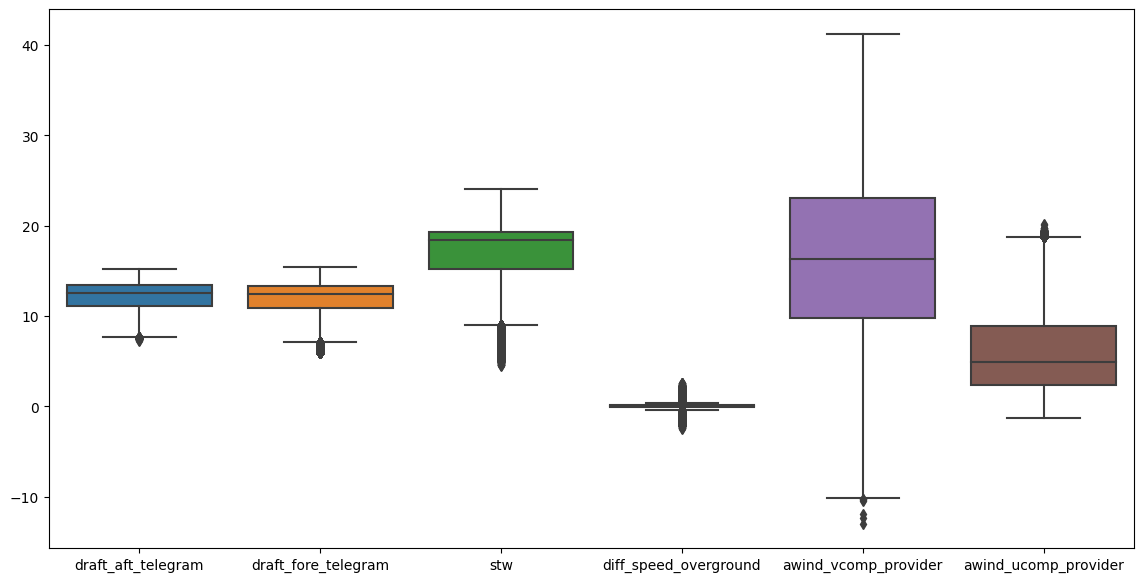

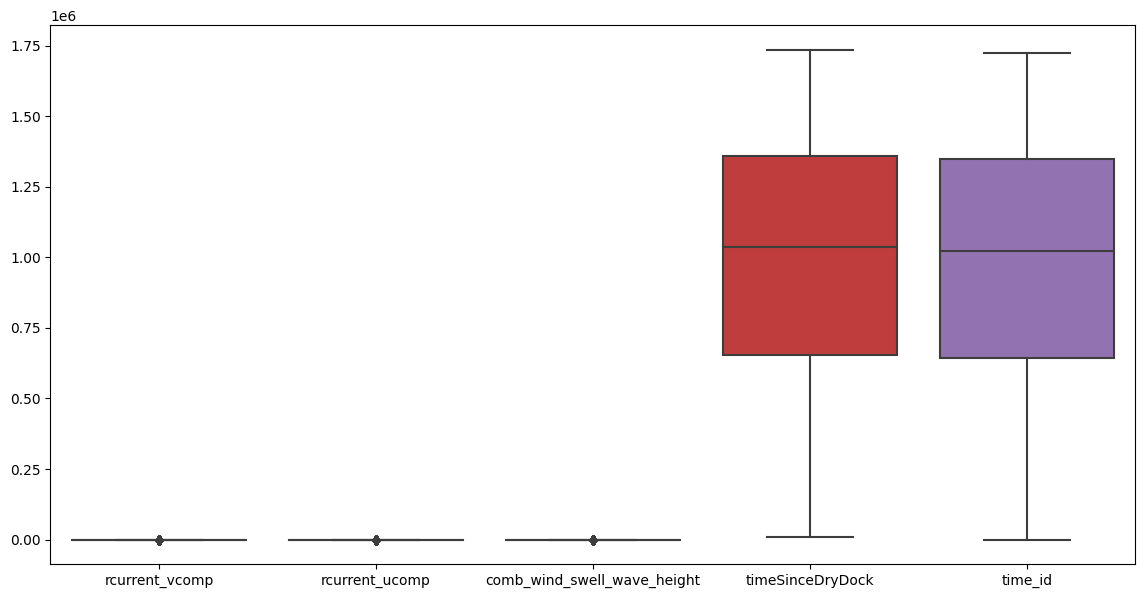

In [2]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [3]:
from sklearn.preprocessing import RobustScaler as RS
features_names=[i for i in X_train.columns] 
scaler=RS()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(data=X_train, columns=features_names)
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(data=X_test, columns=features_names)

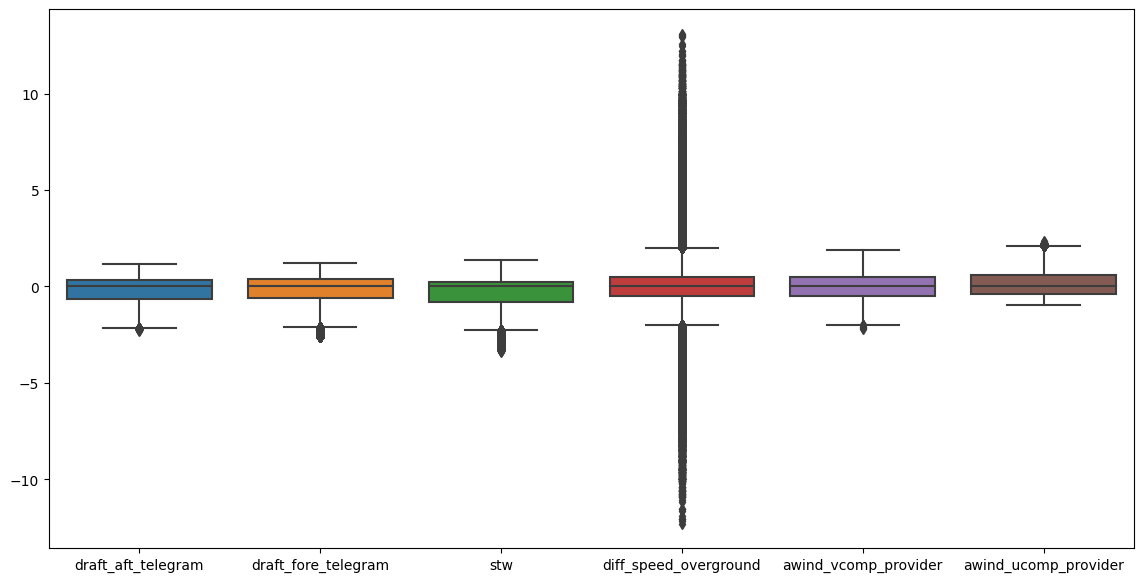

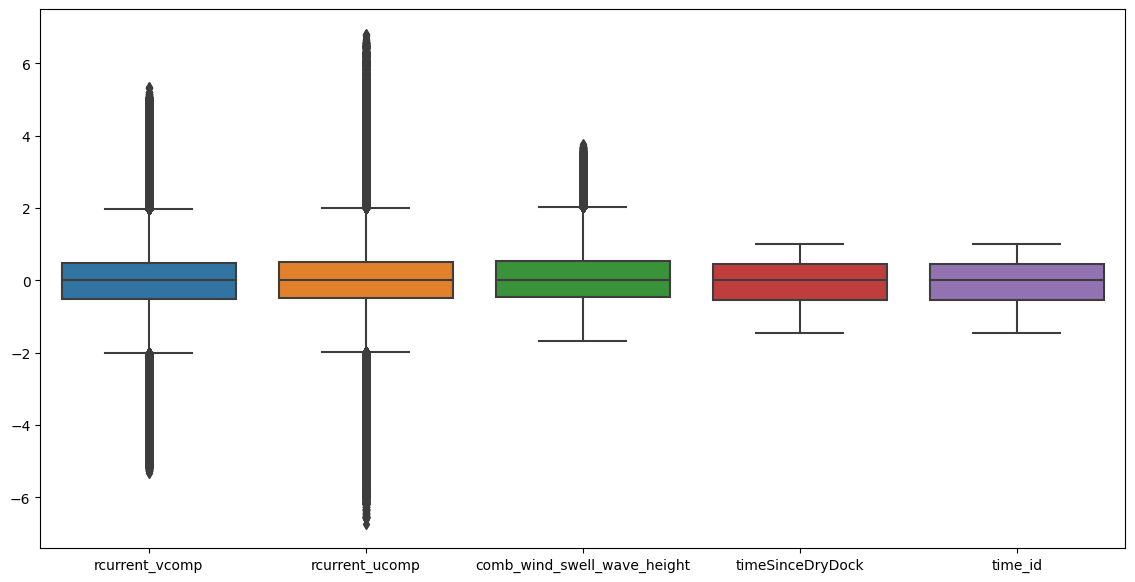

In [4]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {
    'selection':['cyclic', 'random']
}
mod = Lasso()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
lasso = Lasso(alpha=1.0,selection=b_p['selection'])  # You can adjust the alpha value for regularization
lasso.fit(X_train, y_train)

# Predict on the testing set
y_pred_l = lasso.predict(X_test)

np.save('Lasso',y_pred_l)

print(b_p)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_l)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_l)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_l, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test,y_pred_l)
print('Mean Absolute Error:', mae)

print(type(y_pred_l))
b_p

{'selection': 'cyclic'}
Mean Squared Error: 6750440.805340452
R-squared Score: 0.9003967326670629
Root Mean Squared Error: 2598.16104299569
Mean Absolute Error: 1971.962623203171
<class 'numpy.ndarray'>


{'selection': 'cyclic'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 6750370.287447097
R-squared Score: 0.900397773163941
Root Mean Squared Error: 2598.1474722284524
Mean Absolute Error: 1971.9064097903204


{'solver': 'sag'}

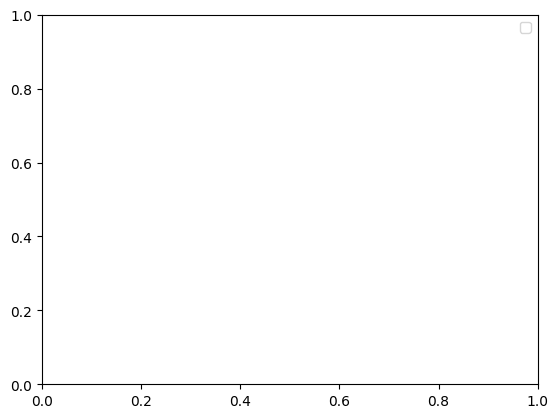

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
mod = Ridge()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
ridge = Ridge(solver=b_p['solver'])  # You can adjust the alpha value for regularization strength

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_r = ridge.predict(X_test)
np.save('Ridge',y_pred_r)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_r)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_r)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_r, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_r)
print('Mean Absolute Error:', mae)
plt.legend()

b_p

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 11983608.768812086
R-squared Score: 0.823180941477329
Root Mean Squared Error: 3461.7349362439763
Mean Absolute Error: 2785.932189165112


{'selection': 'cyclic'}

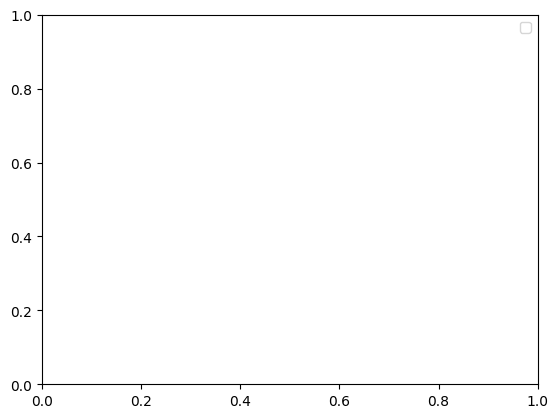

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {
    'selection':['cyclic', 'random']
}
mod = ElasticNet()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
alpha = 0.5  # Regularization strength
l1_ratio = 0.5  # L1 regularization ratio
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,selection=b_p['selection'])
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred_e = elastic_net.predict(X_test)
np.save('Elasticnet',y_pred_e)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_e)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_e)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_e, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_e)
print('Mean Absolute Error:', mae)
plt.legend()

b_p

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error (MSE): 3774774.899664359
R-squared: 0.9443029093514186
Root Mean Squared Error: 1942.8779940244212
Mean Absolute Error: 1483.6533448851292


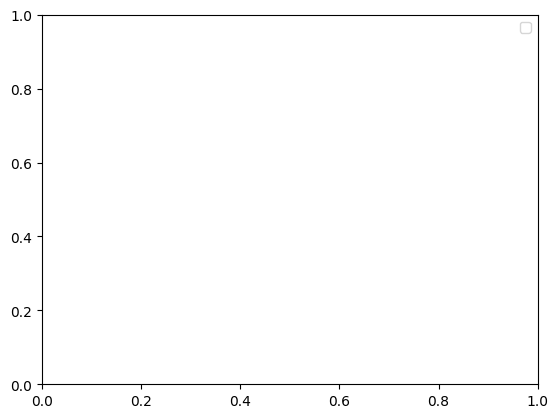

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have your data stored in X and y variables

# Creating polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Creating an instance of the Linear Regression model
p_r = LinearRegression()

# Training the model
p_r.fit(X_train, y_train)

# Making predictions on the test set
y_p_r = p_r.predict(X_test)
np.save('polynomial',y_p_r)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_p_r)
r2 = r2_score(y_test, y_p_r)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_p_r, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_p_r)
print('Mean Absolute Error:', mae)

plt.legend()

In [9]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# Create an instance of the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train)

# Fit the model to the data
pred = model.fit()
X_test = sm.add_constant(X_test)
y_pred_m = pred.predict(X_test)
np.save('multiple',y_pred_m)
mse = mean_squared_error(y_test, y_pred_m)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_m)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_m, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_m)
print('Mean Absolute Error:',mae)


Mean Squared Error (MSE): 3774570.783388738
R-squared: 0.9443059211025848
Root Mean Squared Error: 1942.8254639541706
Mean Absolute Error: 1483.6507835741202


In [10]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(activation='relu', solver='adam', learning_rate='adaptive',random_state=42,verbose=3)

    # Fit the model to the training data
model.fit(X_train, y_train)

    # Make predictions on the testing data
y_pred_mlp = model.predict(X_test)
np.save('ann',y_pred_mlp)
    # Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred_mlp)
print('Mean Squared Error:', mse)

    # Calculate the R-squared score
r2 = r2_score(y_test, y_pred_mlp)
print('R-squared Score:', r2)

    # Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)
print('Root Mean Squared Error:', rmse)

    # Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_mlp)
print('Mean Absolute Error:', mae)

Iteration 1, loss = 119718473.37072200
Iteration 2, loss = 25122509.95104456
Iteration 3, loss = 3934153.71315750
Iteration 4, loss = 1854951.33942521
Iteration 5, loss = 1756563.07254385
Iteration 6, loss = 1706035.12036984
Iteration 7, loss = 1673072.59206316
Iteration 8, loss = 1649458.49904881
Iteration 9, loss = 1631725.27897685
Iteration 10, loss = 1618569.84353181
Iteration 11, loss = 1608982.23439961
Iteration 12, loss = 1601706.80782962
Iteration 13, loss = 1595852.72345189
Iteration 14, loss = 1591169.22567677
Iteration 15, loss = 1587320.54006561
Iteration 16, loss = 1584141.37508566
Iteration 17, loss = 1581256.53056874
Iteration 18, loss = 1578904.16306064
Iteration 19, loss = 1577017.88413133
Iteration 20, loss = 1574960.98203817
Iteration 21, loss = 1573209.36991955
Iteration 22, loss = 1571793.69005589
Iteration 23, loss = 1570245.10496669
Iteration 24, loss = 1568514.33743492
Iteration 25, loss = 1567122.07808506
Iteration 26, loss = 1565481.14757503
Iteration 27, loss

C:\Users\venna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error',splitter='best')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = model.predict(X_test)
np.save('DecisionTree',y_pred_dt)
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_dt)
print('R-squared Score:', r2)

# Calculate the  root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_dt)
print('Mean Absolute Error:', mae)

Mean Squared Error: 4021955.2272728835
R-squared Score: 0.9406557448239173
Root Mean Squared Error: 2005.4812956676717
Mean Absolute Error: 1220.0667770261612


In [12]:
y_pred_rf = np.load('rfprediction.npy')
print("Mean Squared Error: 3134990.4769096286\nR-squared Score: 0.9537429771533129\nRoot Mean Squared Error: 1770.5904317231664\nMean Absolute Error: 1183.0319195359318")

Mean Squared Error: 3134990.4769096286
R-squared Score: 0.9537429771533129
Root Mean Squared Error: 1770.5904317231664
Mean Absolute Error: 1183.0319195359318


In [1]:
import numpy as np
y_pred_l = np.load('Lasso.npy')
y_pred_r = np.load('Ridge.npy')
y_pred_e = np.load('Elasticnet.npy')
y_p_r = np.load('polynomial.npy')
y_pred_m = np.load('multiple.npy')
y_pred_mlp = np.load('ann.npy')
y_pred_dt = np.load('DecisionTree.npy')
y_pred_rf = np.load('rfprediction.npy')
y_pred_ens = np.load('ensemble_main.npy')

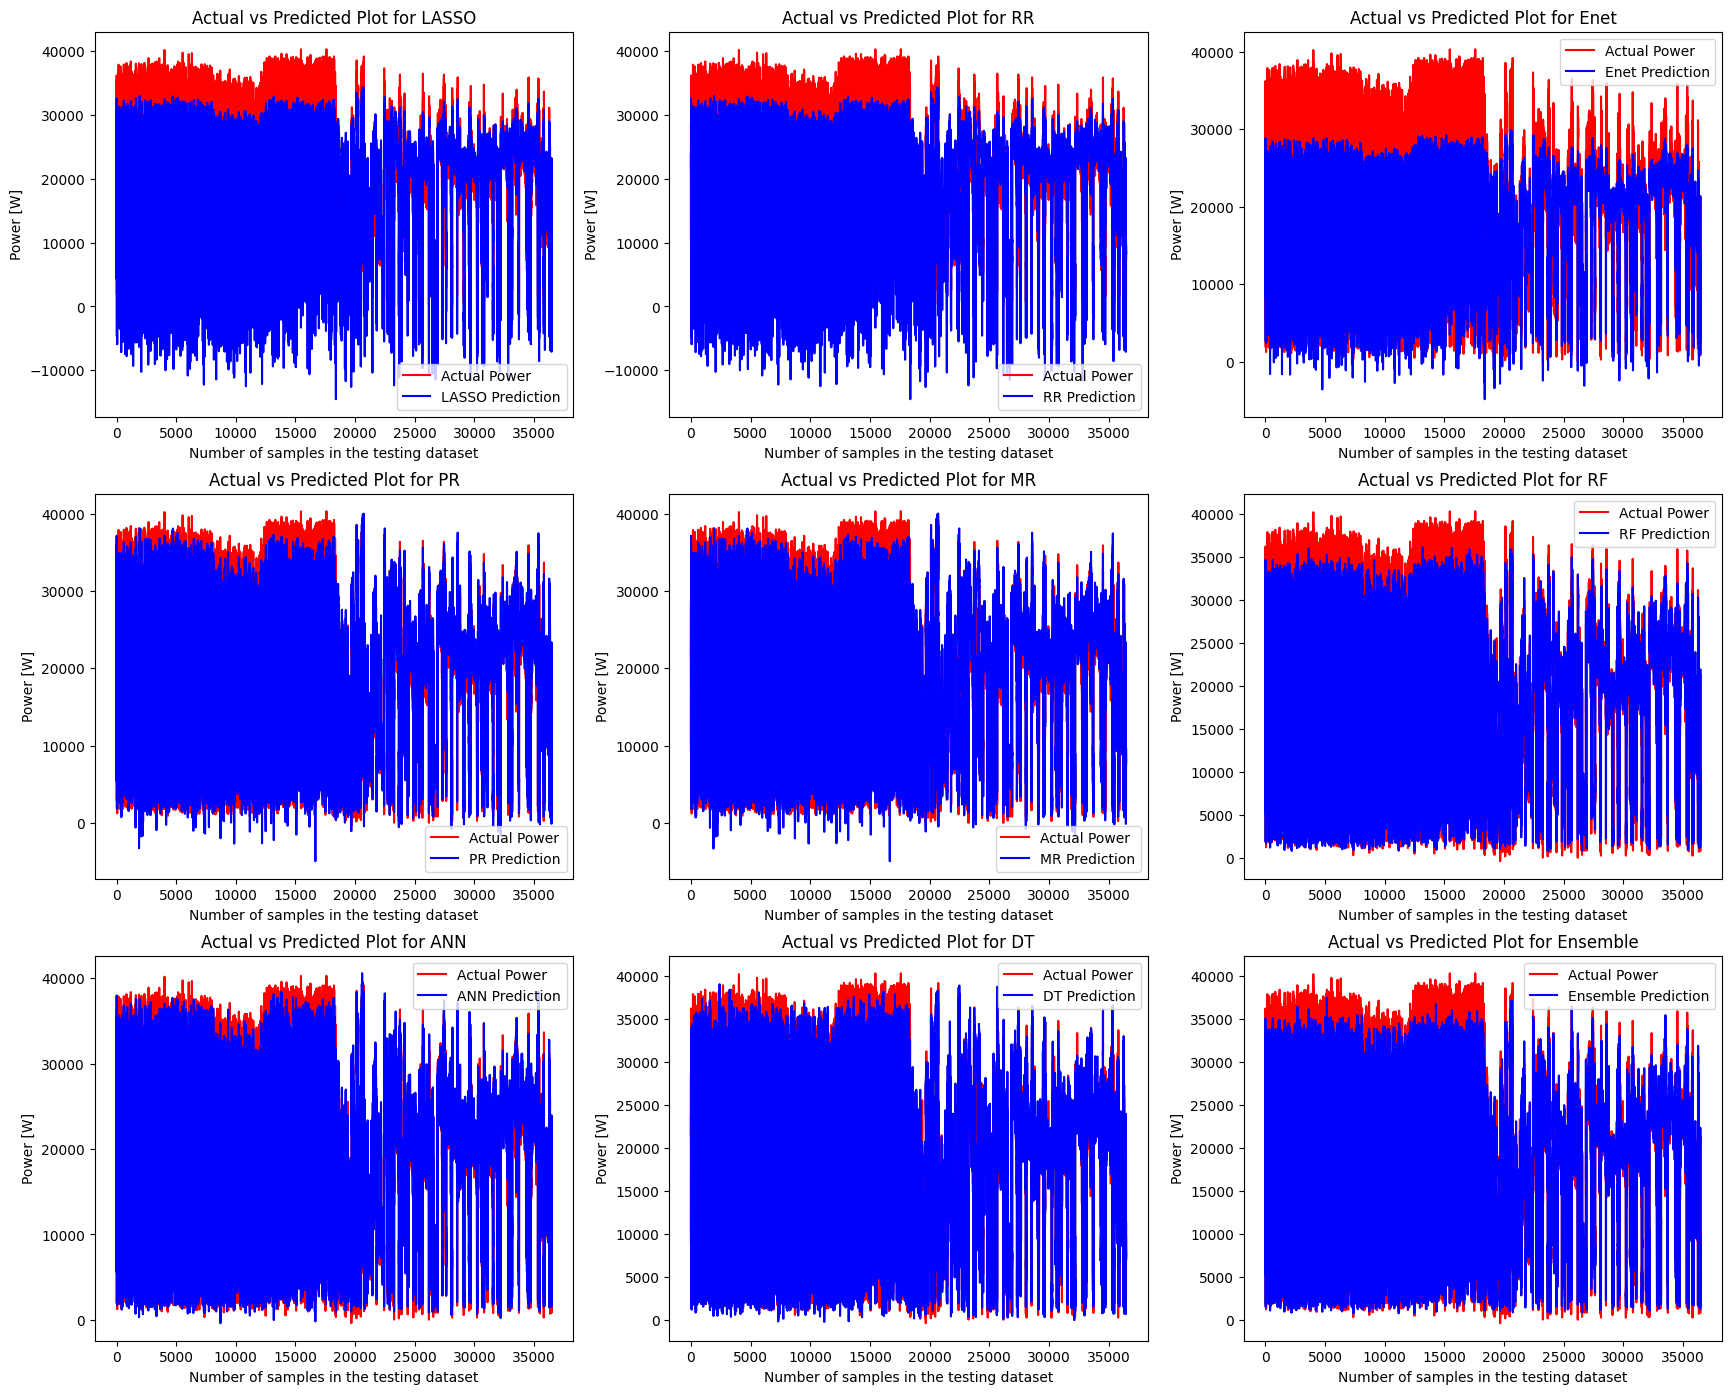

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,17))
plt.subplot(3, 3, 1)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_l, color='b',label='LASSO Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for LASSO')
plt.legend()
plt.subplot(3, 3, 2)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_r, color='b',label='RR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for RR')
plt.legend()
plt.subplot(3, 3, 3)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_e, color='b',label='Enet Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for Enet')
plt.legend()
plt.subplot(3, 3, 4)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_p_r, color='b',label='PR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for PR')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_m, color='b',label='MR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for MR')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_rf, color='b',label='RF Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for RF')
plt.legend()
plt.subplot(3, 3, 7)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_mlp, color='b',label='ANN Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for ANN')
plt.legend()
plt.subplot(3, 3, 8)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_dt, color='b',label='DT Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for DT')
plt.legend()
plt.subplot(3, 3, 9)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_ens, color='b',label='Ensemble Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for Ensemble')
plt.legend()
plt.savefig("fuck")
plt.show()

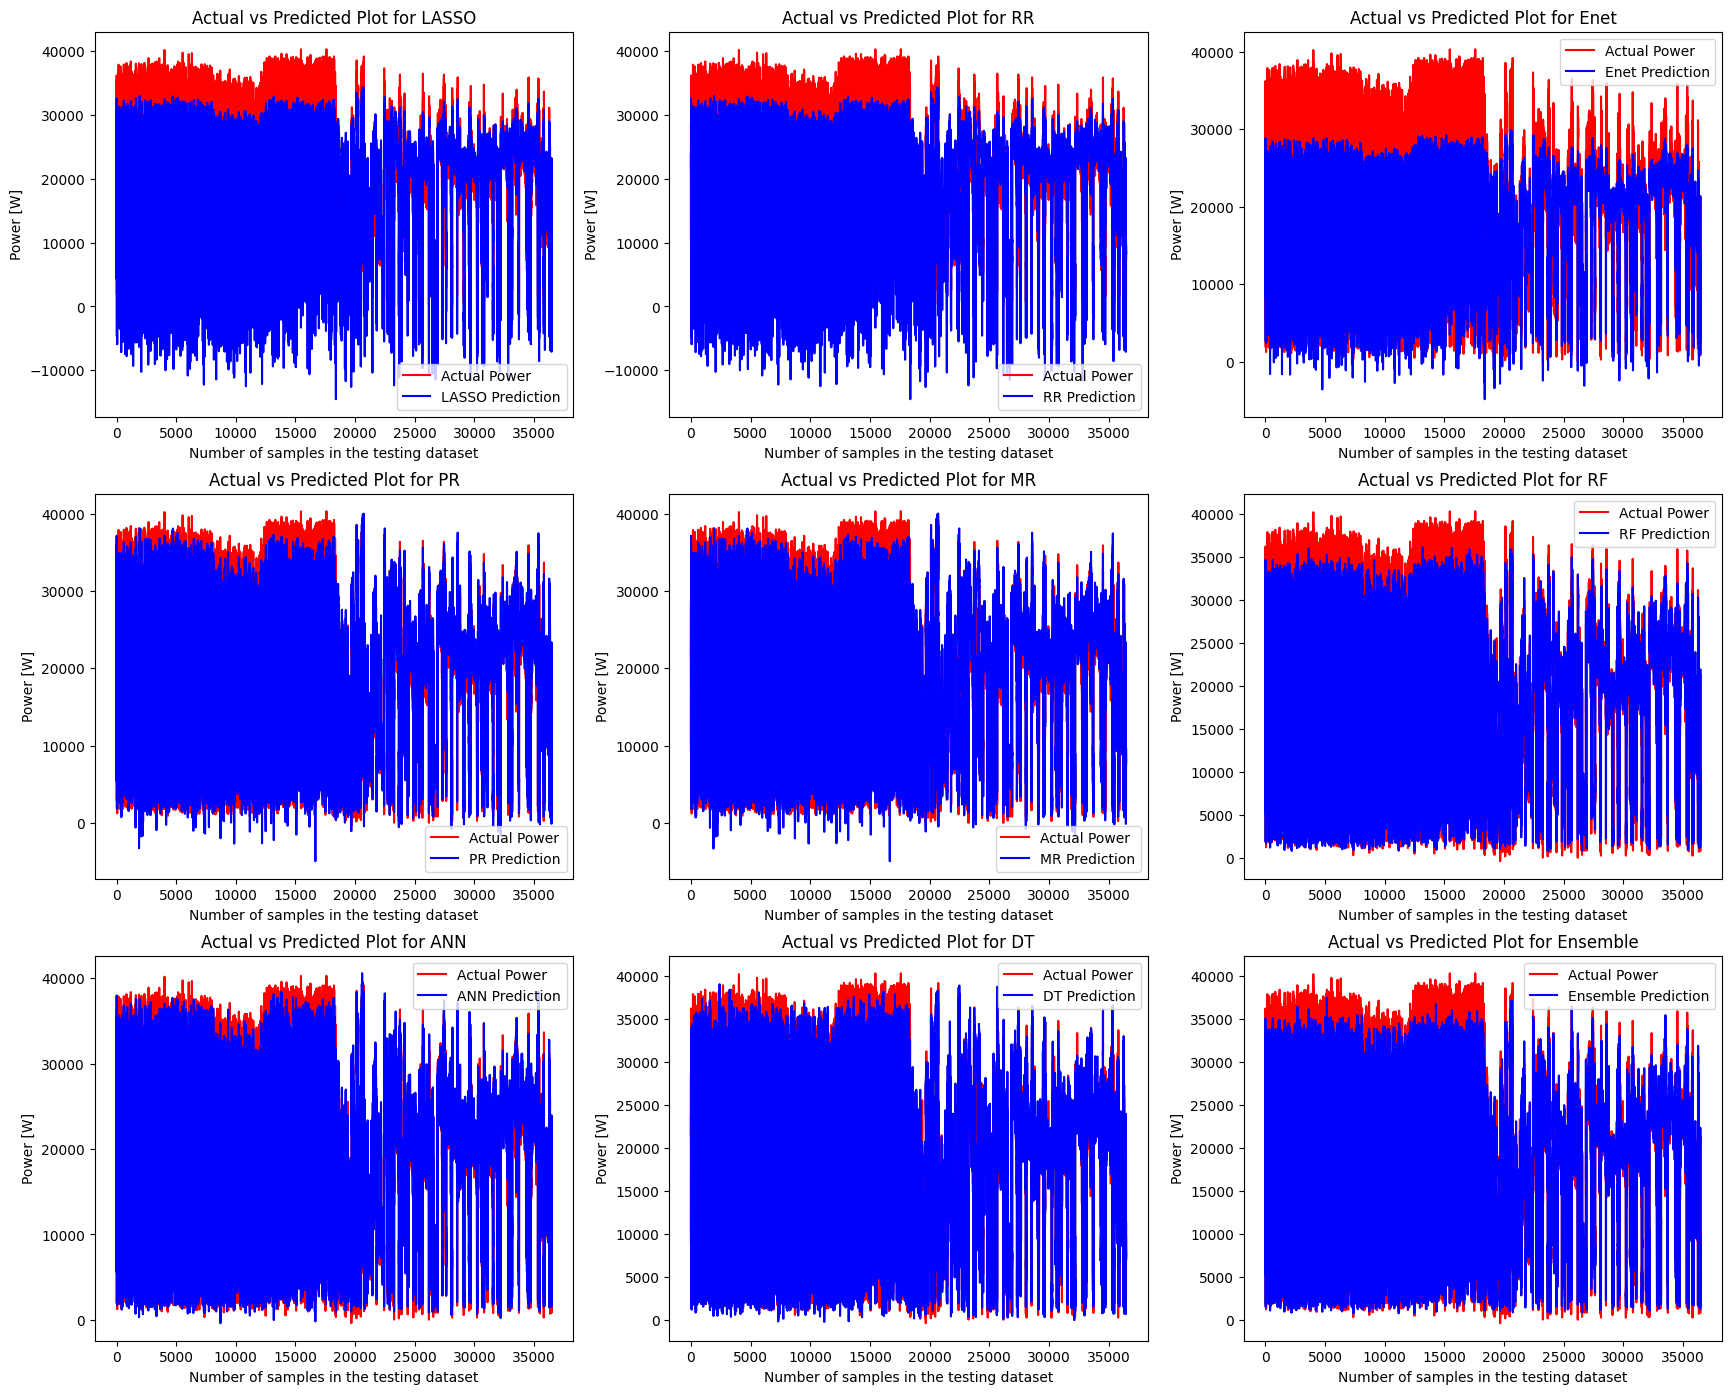

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,17))
plt.subplot(3, 3, 1)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_l, color='b',label='LASSO Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for LASSO')
plt.legend()
plt.subplot(3, 3, 2)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_r, color='b',label='RR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for RR')
plt.legend()
plt.subplot(3, 3, 3)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_e, color='b',label='Enet Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for Enet')
plt.legend()
plt.subplot(3, 3, 4)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_p_r, color='b',label='PR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for PR')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_m, color='b',label='MR Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for MR')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_rf, color='b',label='RF Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for RF')
plt.legend()
plt.subplot(3, 3, 7)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_mlp, color='b',label='ANN Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for ANN')
plt.legend()
plt.subplot(3, 3, 8)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_dt, color='b',label='DT Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for DT')
plt.legend()
plt.subplot(3, 3, 9)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_ens, color='b',label='Ensemble Prediction')
plt.xlabel("Number of samples in the testing dataset")
plt.ylabel("Power [W]")
plt.title('Actual vs Predicted Plot for Ensemble')
plt.legend()
plt.savefig("fuck")
plt.show()